# Visualiza algunas series de tiempo más

## Instrucciones
Has comenzado a aprender acerca de la predicción de series de tiempo al mirar el tipo de datos que requiere este modelado especial. Ya has visualizado algunos datos referentes a la energía. Ahora, busca otros datos que te beneficiarían de la predicción de series de tiempo. Encuentra tres ejemplos prueba [Kaggle](https://kaggle.com) y [Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/catalog/?WT.mc_id=academic-77952-leestott) y crea un notebook para visualizarlos. Anota cualquier característica especial que tengan (estacionalidad, cambios abruptos, u otras tendencias) en el notebook.

Para esta asignación se han utilizado estos [conjuntos de datos](https://www.kaggle.com/datasets/vitthalmadane/energy-consumption-time-series-dataset/code) del mismo autor.

### Acerca del conjunto de datos
- Este conjunto de datos presenta el consumo de máquinas sopladoras eléctricas con intervalos de tiempo de alrededor de 10 a 15 minutos. Estos datos se registran con la ayuda de un dispositivo IoT.
- El consumo de energía se mide entre la marca de tiempo actual y anterior.
- Un valor nulo o inferior a 0,5 de consumo de energía significa que la máquina estuvo encendida durante el intervalo de tiempo respectivo.
- El consumo de la serie temporal anterior es estacionario con el tiempo, ya que KWH, es decir, la capacidad de kilovatios/hora del motor del ventilador es fija.

1. Importamos las librerías y sus distintos recursos para utilizarlos para la exploración de los datos

In [1]:
import sys
sys.path.append('./common')

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from common.utils import load_data
%matplotlib inline

2. Obtener la ruta deslos archivos del conjunto de datos

In [9]:
for dirname, _, filenames in os.walk('./Data/TaskTimeseries'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Data/TaskTimeseries\KwhConsumptionBlower78_1.csv
./Data/TaskTimeseries\KwhConsumptionBlower78_2.csv
./Data/TaskTimeseries\KwhConsumptionBlower78_3.csv
./Data/TaskTimeseries\Month_Value_1.csv


Los archivos de datos de entrada están disponibles en el archivo de solo lectura directorio.
Por ejemplo, al ejecutar esto se enumerarán todos los archivos en el directorio de entrada

In [12]:
df = pd.concat(res,ignore_index=True).sort_values('datetime')
df.head()

,datetime,consumption
43,2022-01-01 00:22:28,1.030
19,2022-01-01 00:42:33,0.904
25,2022-01-01 01:01:51,0.904
11,2022-01-01 01:41:48,1.850
29,2022-01-01 02:22:52,1.878


In [13]:
print(f"min date: {df['datetime'].min()}, max date: {df['datetime'].max()}")
print(f"range: {df['datetime'].max()-df['datetime'].min()}")

min date: 2022-01-01 00:22:28, max date: 2022-02-28 23:50:27
range: 58 days 23:27:59


Veamos consumo diario de energía

In [14]:
df.sort_values('datetime').rolling('1D',on='datetime').sum().head()

,datetime,consumption
43,2022-01-01 00:22:28,1.030
19,2022-01-01 00:42:33,1.934
25,2022-01-01 01:01:51,2.838
11,2022-01-01 01:41:48,4.688
29,2022-01-01 02:22:52,6.566


Podemos observar el detalle en el siguiente gráfico

<Axes: title={'center': 'Hourly energy consumption'}, xlabel='datetime'>

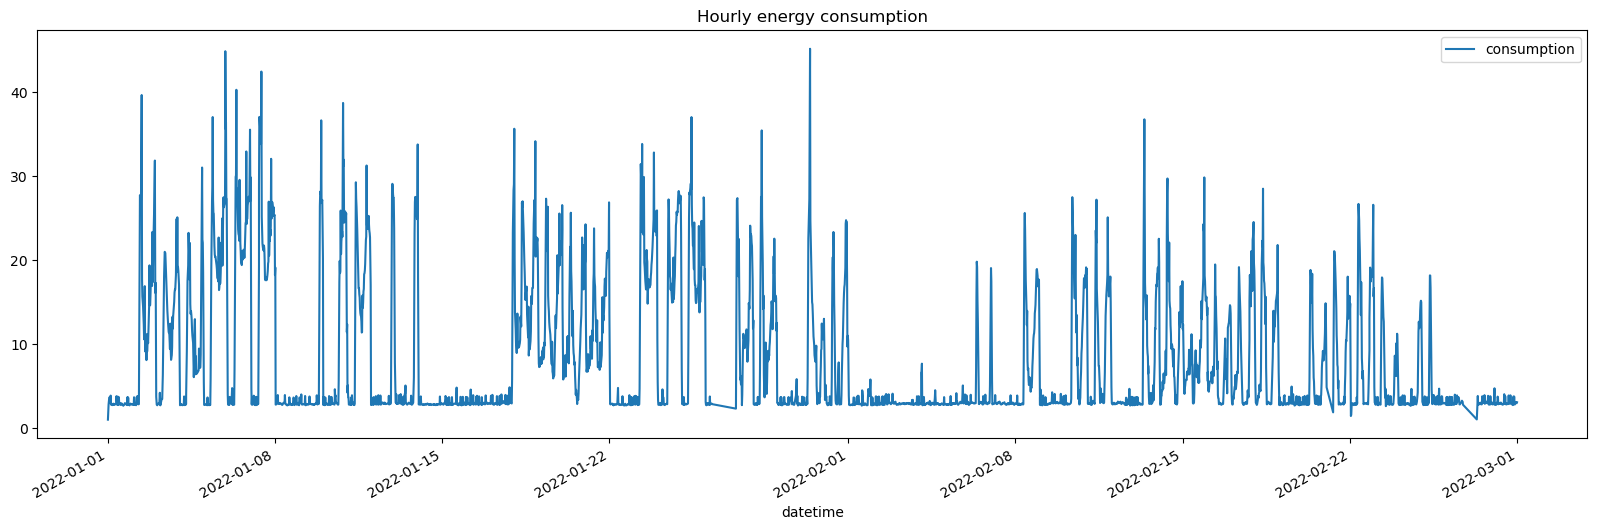

In [15]:
import matplotlib.pyplot as plt
df.rolling('1H',on='datetime').sum().loc[df['consumption']>0.5].plot(x='datetime',y='consumption',title="Hourly energy consumption",figsize=(20,6))


Este consumo total mensual y consumo medio diario de un mes

In [19]:
daily_cons = df.rolling('1d',on='datetime').sum()
daily_cons.groupby(daily_cons['datetime'].dt.month)['consumption'].apply(lambda x: {'sum':x.sum(),'average':x.mean(),'count':x.count()})

datetime         
1         sum        394803.692000
          average       212.488532
          count        1858.000000
2         sum        230673.132000
          average       131.964034
          count        1748.000000
Name: consumption, dtype: float64

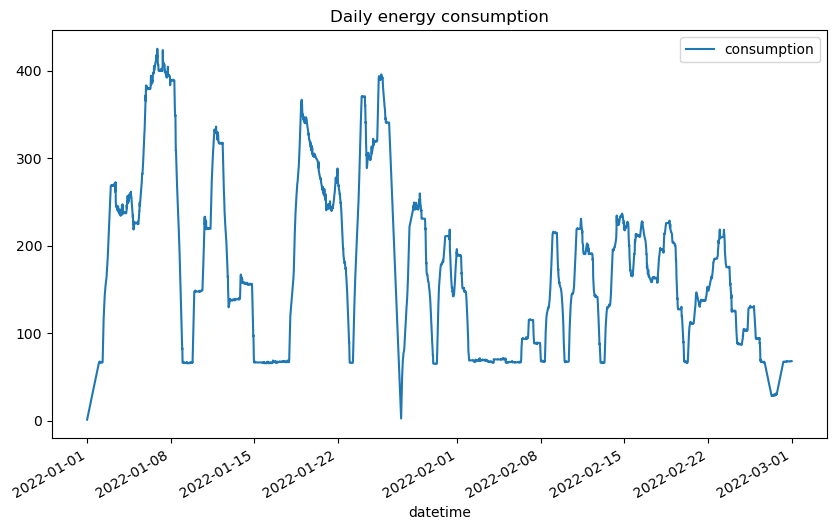

In [17]:
daily_cons.plot(x='datetime',y='consumption',title="Daily energy consumption",figsize=(10,6))
plt.show()

In [18]:
daily_cons.describe()

,datetime,consumption
count,3606,3606.000000
mean,2022-01-30 12:02:06.618691072,173.454471
min,2022-01-01 00:22:28,1.030000
25%,2022-01-15 11:04:40.249999872,81.581500
50%,2022-01-31 03:55:32.500000,159.762000
75%,2022-02-14 05:26:33.249999872,230.291500
max,2022-02-28 23:50:27,425.264000
std,NaN,96.549275


Vámos separar el tiempo de consumo diurno y nocturno

In [22]:
day_consumption = df.loc[(pd.Timestamp('06:00').time() <= df['datetime'].dt.time) & 
                         (df['datetime'].dt.time < pd.Timestamp('18:00').time()) & 
                         (df['consumption'] > 0.5)]
night_consumption = df.loc[df.index.difference(day_consumption.index)].sort_values('datetime')
night_consumption = night_consumption.loc[night_consumption['consumption'] > 0.5]

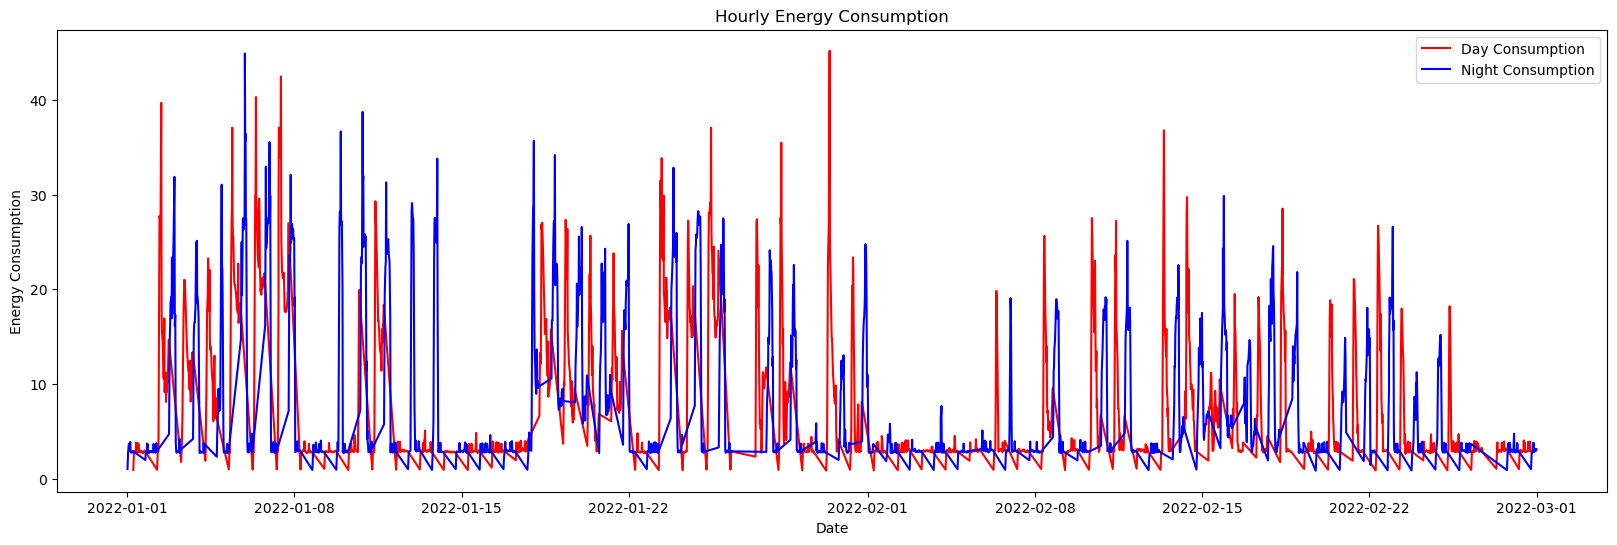

In [23]:
fig,ax= plt.subplots(1,1,figsize=(20,6))
day_hourly_cons = day_consumption.rolling('1H',on='datetime').sum()
night_hourly_cons = night_consumption.rolling('1H',on='datetime').sum()
ax.plot(day_hourly_cons['datetime'],day_hourly_cons['consumption'],'r-',label='Day Consumption')
ax.plot(night_hourly_cons['datetime'],night_hourly_cons['consumption'],'b-',label='Night Consumption')
ax.legend()
ax.set_title("Hourly Energy Consumption")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

In [24]:
daily_day_cons= day_consumption.rolling('1d',on='datetime').sum()
daily_night_cons= night_consumption.rolling('1d',on='datetime').sum()

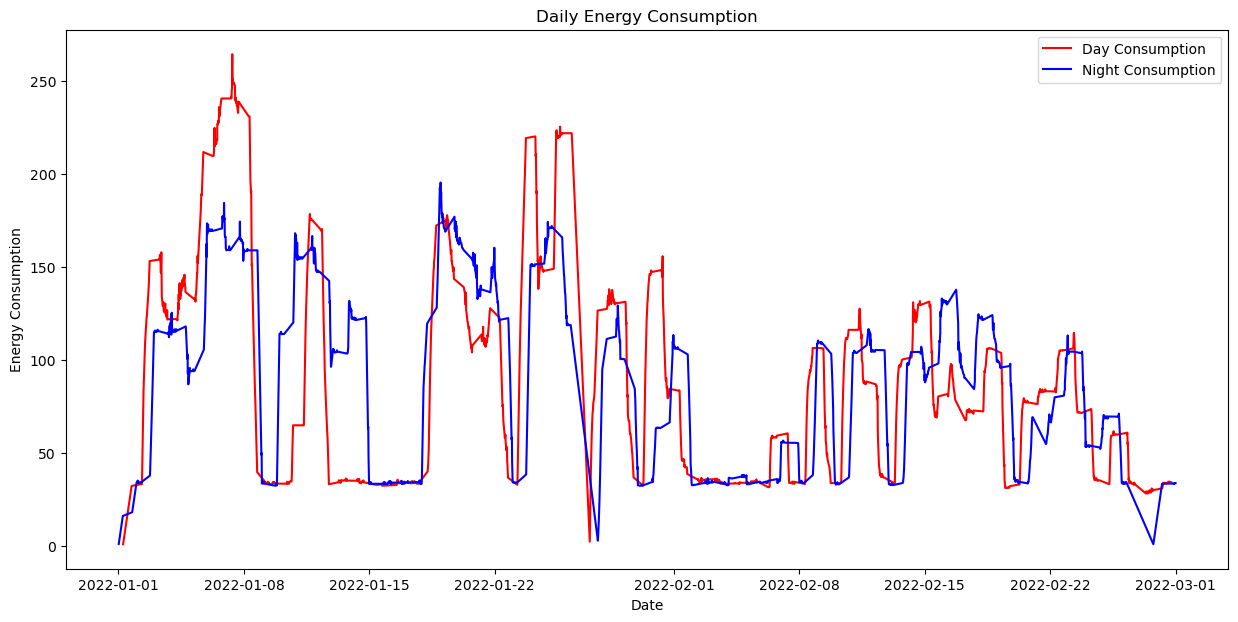

In [25]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(daily_day_cons['datetime'],daily_day_cons['consumption'],'r-',label='Day Consumption')
ax.plot(daily_night_cons['datetime'],daily_night_cons['consumption'],'b-',label='Night Consumption')
ax.legend()
ax.set_title("Daily Energy Consumption")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

## Pronóstico de series temporales

In [26]:
df_copy = df.set_index('datetime').sort_index()
df_copy = df_copy.resample('1D').sum()

### Descomposición aditiva

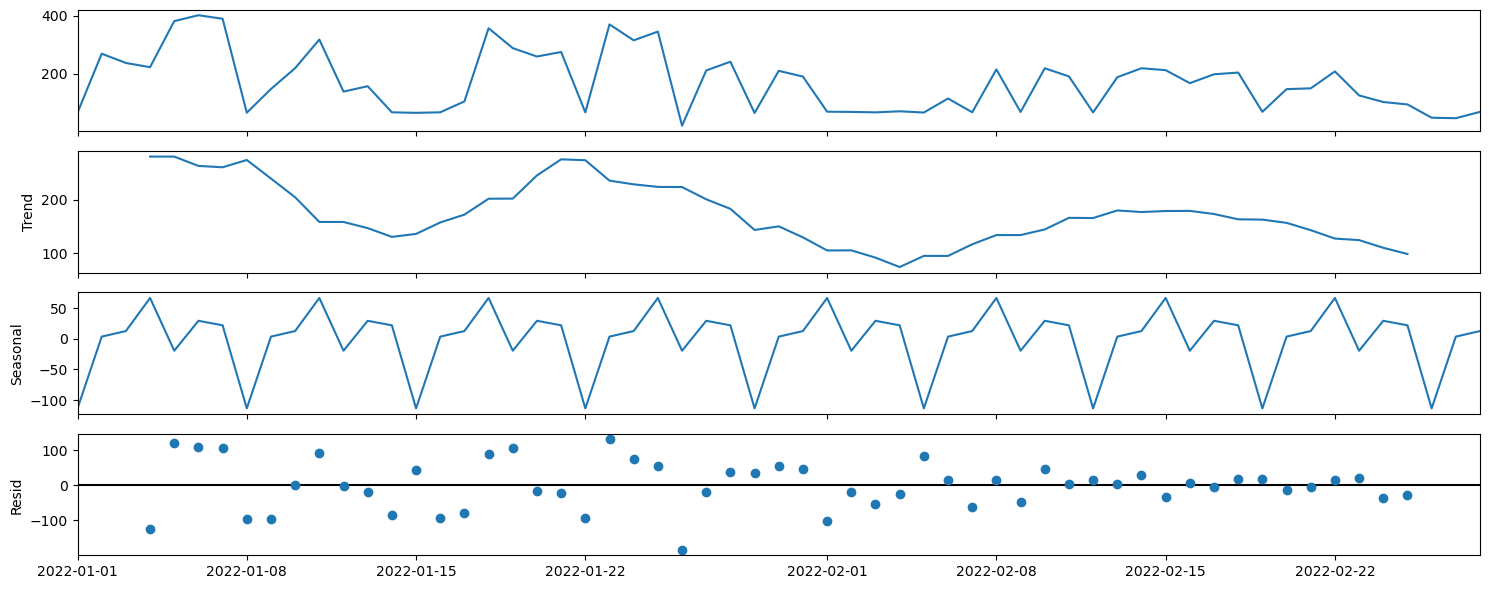

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_copy,model='additive')
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

Importamos la función seasonal_decompose de Statsmodels para descomponer una serie temporal en sus componentes.

### Descomposición multiplicativa

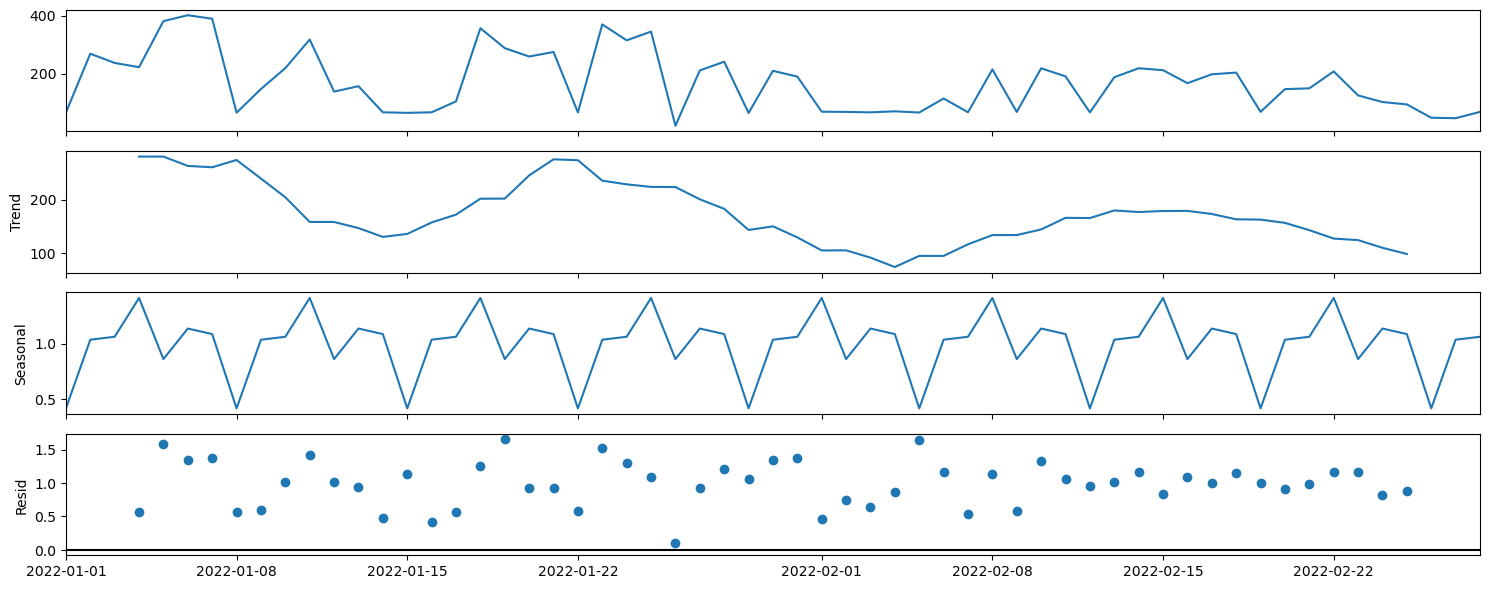

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_copy,model='multiplicative')
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

Ahora utilizamos un modelo de descomposición multiplicativo en lugar de uno aditivo. Dependiendo de la naturaleza de los datos y los objetivos de análisis, podemos probar ambos modelos y ver cuál se ajusta mejor a la serie temporal

### Previsión de autorregresión

In [29]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_copy,lags=15)
model_fit = model.fit()

next_one_m = model_fit.predict('2022-03-01','2022-03-31')

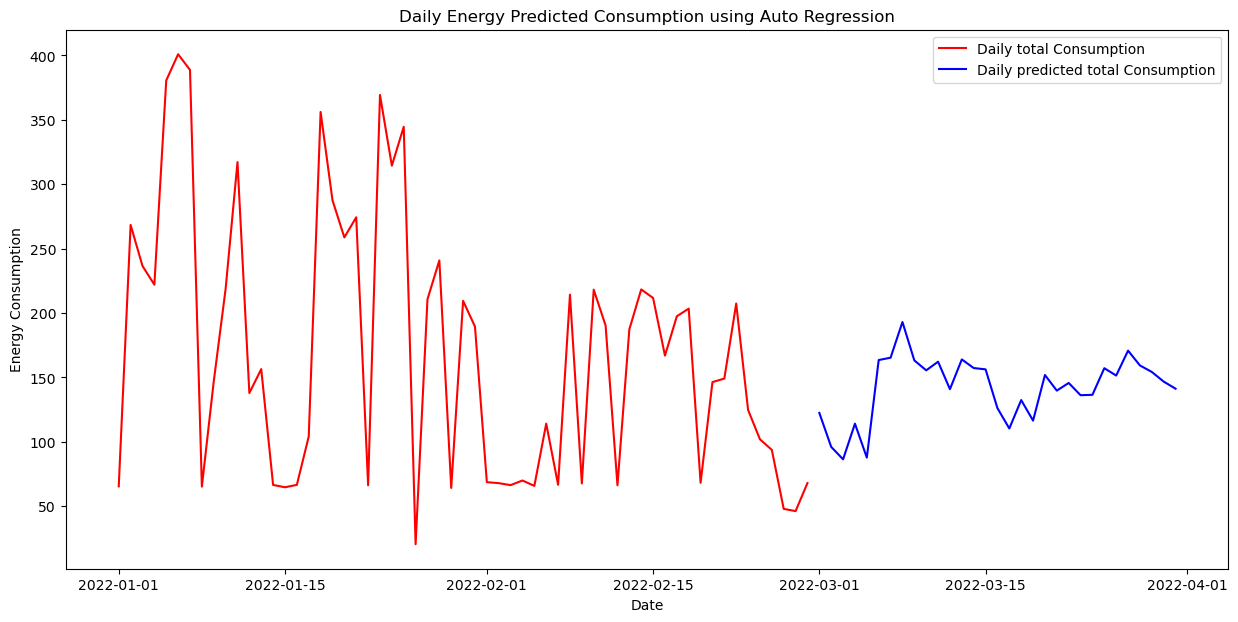

In [30]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],'r-',label='Daily total Consumption')
ax.plot(next_one_m,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using Auto Regression")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

1. Se importa la clase `AutoReg` del módulo `ar_model` en statsmodels.tsa, que se utiliza para ajustar modelos de autorregresión.
2. Se crea un modelo `AutoReg` con un retraso (lags) de 15 períodos, lo que significa que se utilizarán las 15 observaciones anteriores para predecir la siguiente.
3. El modelo se ajusta a los datos mediante el método fit(), que estima los parámetros del modelo.
4. Se realiza la predicción del consumo de energía para el mes de marzo de 2022 utilizando el método predict() del modelo ajustado. Se especifica el inicio y el final del período de predicción

Esto es útil para realizar predicciones de series temporales utilizando modelos de autorregresión y visualizar las predicciones junto con los datos originales.

### Pronóstico de medias móviles

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_copy,order=(0,0,1))
model_fit = model.fit()

next_one_m = model_fit.predict('2022-03-01','2022-03-31')

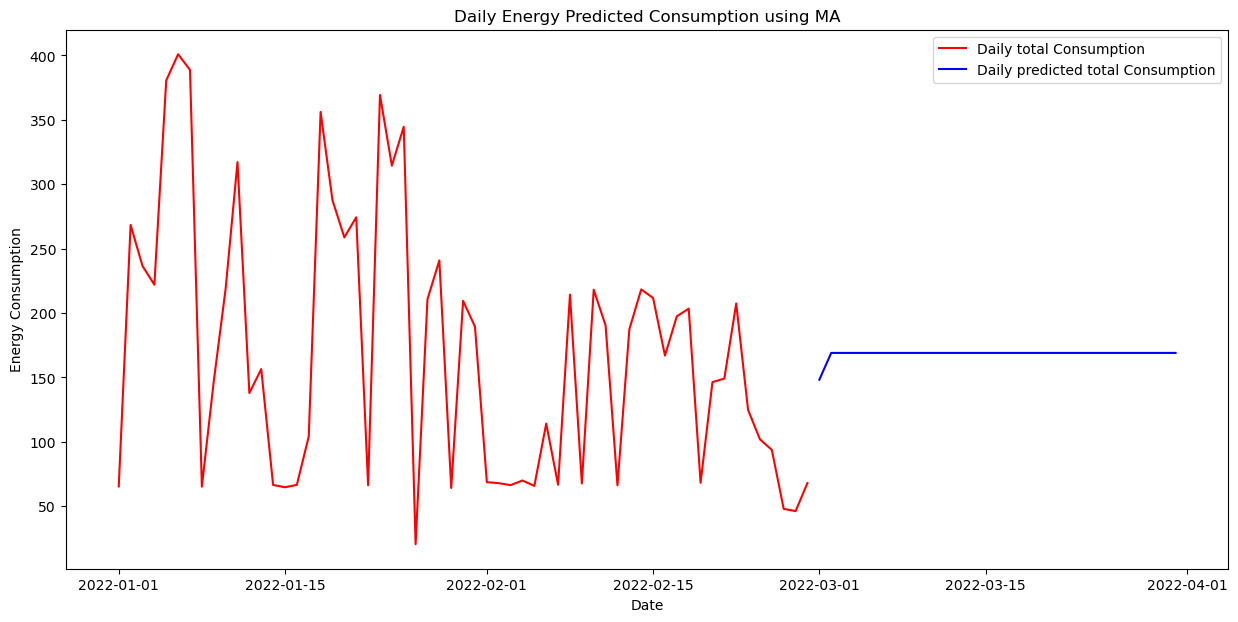

In [32]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],'r-',label='Daily total Consumption')
ax.plot(next_one_m,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using MA")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

1. Se importa la clase ARIMA del módulo model en statsmodels.tsa.arima, que se utiliza para ajustar modelos ARIMA.
2. Se crea un modelo ARIMA con los parámetros (p, d, q) = (0, 0, 1). Aquí, p, d y q son los componentes de autorregresión, diferenciación y medias móviles respectivamente. En este caso, estamos utilizando un modelo de media móvil (MA) de orden 1.
3. El modelo se ajusta a los datos mediante el método fit(), que estima los parámetros del modelo.
4. Se realiza la predicción del consumo de energía para el mes de marzo de 2022 utilizando el método predict() del modelo ajustado. Se especifica el inicio y el final del período de predicción.

### Media Móvil Autorregresiva (ARMA)

In [33]:
model = ARIMA(df_copy,order=(9,0,1))
model_fit = model.fit()

next_one_m = model_fit.predict('2022-03-01','2022-03-31')

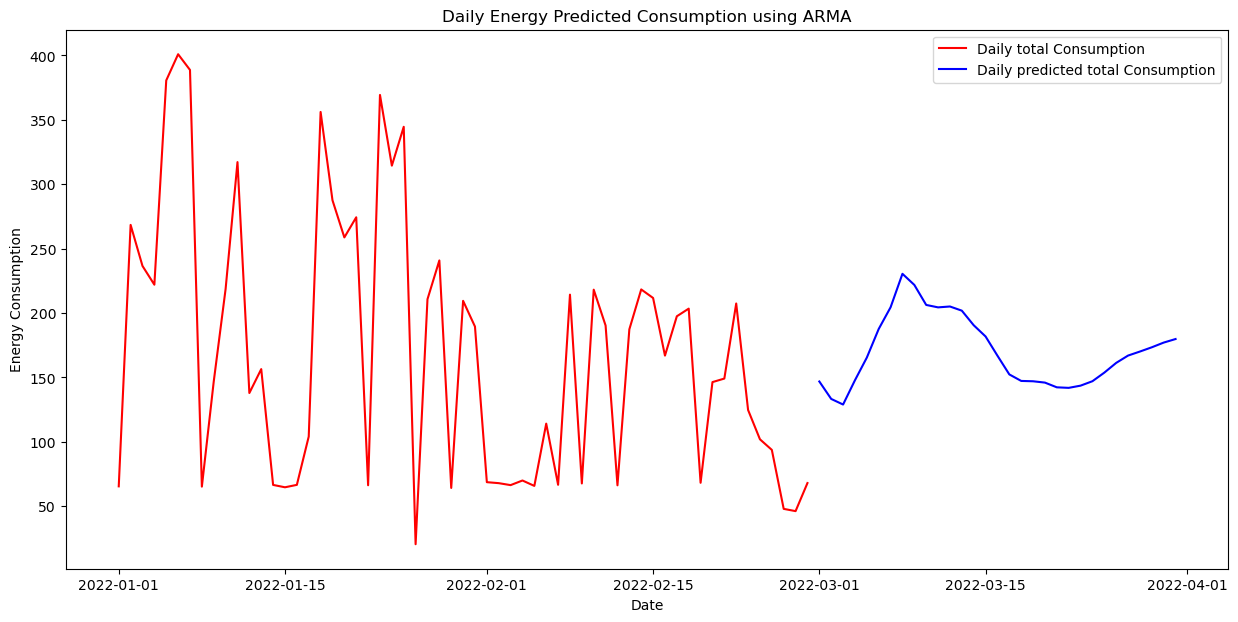

In [34]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],'r-',label='Daily total Consumption')
ax.plot(next_one_m,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using ARMA")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

1. Se crea un modelo ARMA con los parámetros (p, d, q) = (9, 0, 1). Aquí, p representa el orden del componente autorregresivo (AR), d representa el grado de diferenciación y q representa el orden del componente de media móvil (MA). En este caso, estamos utilizando un modelo con un componente autorregresivo de orden 9 y un componente de media móvil de orden 1.
2. El modelo se ajusta a los datos mediante el método fit(), que estima los parámetros del modelo.
3. Se realiza la predicción del consumo de energía para el mes de marzo de 2022 utilizando el método predict() del modelo ajustado. Se especifica el inicio y el final del período de predicción.

### Media Móvil Integrada Autorregresiva (ARIMA)

In [35]:
model = ARIMA(df_copy,order=(10,1,1))
model_fit = model.fit()

next_one_m = model_fit.predict('2022-03-01','2022-03-31')

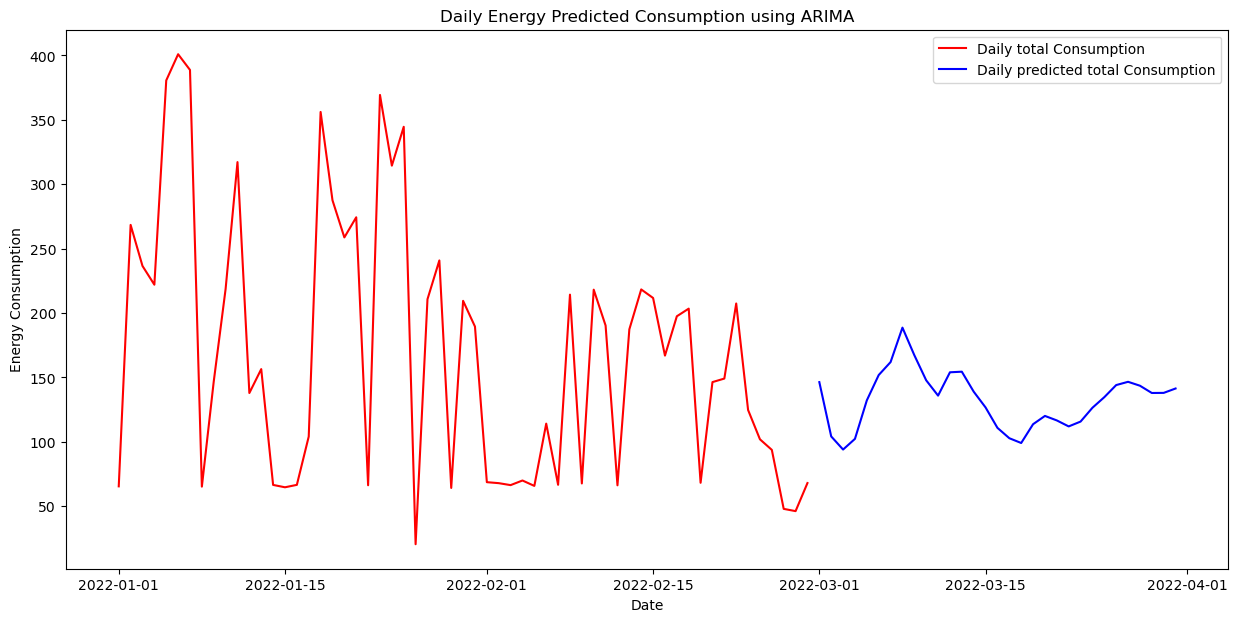

In [36]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],'r-',label='Daily total Consumption')
ax.plot(next_one_m,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using ARIMA")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

1. Se crea un modelo ARIMA con los parámetros (p, d, q) = (10, 1, 1). Aquí, p representa el orden del componente autorregresivo (AR), d representa el grado de diferenciación y q representa el orden del componente de media móvil (MA). En este caso, estamos utilizando un modelo con un componente autorregresivo de orden 10, un grado de diferenciación de 1 y un componente de media móvil de orden 1.
2. El modelo se ajusta a los datos mediante el método fit(), que estima los parámetros del modelo.
3. Se realiza la predicción del consumo de energía para el mes de marzo de 2022 utilizando el método predict() del modelo ajustado. Se especifica el inicio y el final del período de predicción.
4. Se crea una figura y un solo conjunto de ejes (ax) para trazar los resultados.
5. Se traza la serie temporal original de consumo de energía en rojo y la serie temporal predicha en azul.
6. Se agregan leyendas, títulos y etiquetas de ejes para hacer la trama más legible.

### Media Móvil Integrada Autorregresiva Estacional (SARIMA)

In [37]:
model = ARIMA(df_copy,order=(5,1,1),seasonal_order=(1,0,1,7))
model_fit = model.fit()

next_one_m = model_fit.predict('2022-03-01','2022-03-31')

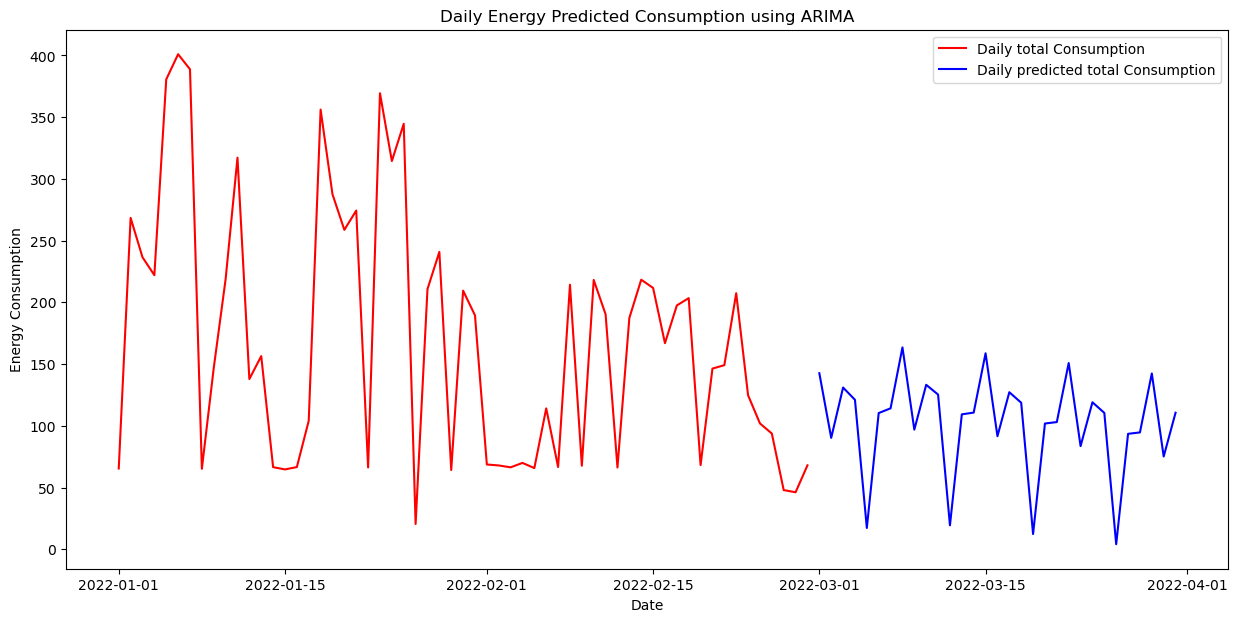

In [38]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df_copy['consumption'],'r-',label='Daily total Consumption')
ax.plot(next_one_m,'b-',label='Daily predicted total Consumption')
ax.legend()
ax.set_title("Daily Energy Predicted Consumption using ARIMA")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()

1. Se crea un modelo SARIMA con los parámetros (p, d, q) = (5, 1, 1) y (P, D, Q, s) = (1, 0, 1, 7). Aquí, (p, d, q) son los parámetros del componente ARIMA y (P, D, Q, s) son los parámetros del componente estacional. En este caso, estamos utilizando un modelo con un componente AR de orden 5, un grado de diferenciación de 1, un componente MA de orden 1 y un componente estacional de orden 1 con un período de estacionalidad de 7 días (una semana).
2. El modelo se ajusta a los datos mediante el método fit(), que estima los parámetros del modelo.
3. Se realiza la predicción del consumo de energía para el mes de marzo de 2022 utilizando el método predict() del modelo ajustado. Se especifica el inicio y el final del período de predicción.
4. Se traza la serie temporal original de consumo de energía en rojo y la serie temporal predicha en azul.

### Conclusión

Los análisis de series temporales son una herramienta poderosa para comprender y predecir el comportamiento de los datos que varían con el tiempo. A través de técnicas como el suavizado exponencial, los modelos ARIMA y SARIMA, entre otros, podemos capturar patrones, tendencias y estacionalidades en los datos, lo que nos permite realizar pronósticos precisos y tomar decisiones informadas.